# 4.3 기울기



In [6]:
  
import numpy as np
import matplotlib.pylab as plt


def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = tmp_val + h
        fxh1 = f(x)
        
        x[idx] = tmp_val -h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 -fxh2) / (2*h)
        x[idx] = tmp_val
    
    return grad        
        
    
def function_2(x):
    return x[0]**2 + x[1]**2
    # or return np.sum(x**2)    

In [9]:
numerical_gradient(function_2, np.array([3.0,4.0]))

array([6., 8.])

In [10]:
numerical_gradient(function_2, np.array([0.0,2.0]))

array([0., 4.])

In [11]:
numerical_gradient(function_2, np.array([3.0,0.0]))

array([6., 0.])

4.4.1  경사법 (경사 하강법)

 현 위치에서 기울어진 방향으로 일정거리만큼 이동한다. 이동한 곳에서도 기울기를 구하고, 기울어진 방향으로 나아가기를 반복한다.
함수값을 점차 줄이는 방법이다.

$$x_0 = x_0 - \eta \frac{\partial f}{\partial x_0}$$

In [13]:
def gradient_descent(f, init_x, lr = 0.01, step_num = 100):
    x = init_x
    
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr *grad   #lr은 학습률 eta
    return x    

In [15]:
def function_2(x):
    return x[0]**2 + x[1]**2
init_x = np.array([-3.0, 4.0])  #초기값 (-3,4)
gradient_descent(function_2, init_x = init_x, lr = 0.1, step_num = 100)

array([-6.11110793e-10,  8.14814391e-10])

In [17]:
#학습률이 너무 큰 예 : lr = 10.0

init_x = np.array([-3.0,4.0])
gradient_descent(function_2, init_x = init_x , lr = 10.0, step_num = 100)

array([-2.58983747e+13, -1.29524862e+12])

In [20]:
#학습률이 너무 작은 예 : lr = 1e-10

init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x = init_x , lr = 1e-10, step_num = 100)

array([-2.99999994,  3.99999992])

IndexError: invalid index to scalar variable.

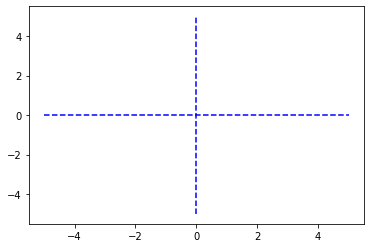

In [21]:
# 그래프
init_x = np.array([-3.0, 4.0])
x, x_history = gradient_descent(function_2, init_x, lr=0.1, step_num=20)

plt.plot([-5, 5], [0, 0], '--b')
plt.plot([0, 0], [-5, 5], '--b')
plt.plot(x_history[:, 0], x_history[:, 1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()